# Project : Bankruptcy Prevention

- **Business Objective :**
  This is a classification project, since the variable to predict is binary (bankruptcy or non-bankruptcy). The goal here is to model the probability that a business goes bankrupt from different features.

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Importing Dataset

In [2]:
bankruptcy = pd.read_csv(r"C:\Users\dipen\Documents\A Saloni\Data Science\2. Data Science Project\dataset.csv" , sep = ';')
bankruptcy

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,non-bankruptcy
246,1.0,1.0,0.5,1.0,1.0,0.0,non-bankruptcy
247,0.0,1.0,1.0,0.5,0.5,0.0,non-bankruptcy
248,1.0,0.0,0.5,1.0,0.5,0.0,non-bankruptcy


In [3]:
bankruptcy.describe()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,0.518000,0.614000,0.376000,0.470000,0.476000,0.570000
std,0.411526,0.410705,0.401583,0.415682,0.440682,0.434575
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000
75%,1.000000,1.000000,0.500000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
bankruptcy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   industrial_risk         250 non-null    float64
 1    management_risk        250 non-null    float64
 2    financial_flexibility  250 non-null    float64
 3    credibility            250 non-null    float64
 4    competitiveness        250 non-null    float64
 5    operating_risk         250 non-null    float64
 6    class                  250 non-null    object 
dtypes: float64(6), object(1)
memory usage: 13.8+ KB


In [5]:
bankruptcy.shape

(250, 7)

#**Checking is there any missing values are there in data or not**

In [6]:
bankruptcy.isnull().sum()

industrial_risk           0
 management_risk          0
 financial_flexibility    0
 credibility              0
 competitiveness          0
 operating_risk           0
 class                    0
dtype: int64

In [7]:
bankruptcy_new = bankruptcy.iloc[: , :]
bankruptcy_new

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,non-bankruptcy
246,1.0,1.0,0.5,1.0,1.0,0.0,non-bankruptcy
247,0.0,1.0,1.0,0.5,0.5,0.0,non-bankruptcy
248,1.0,0.0,0.5,1.0,0.5,0.0,non-bankruptcy


In [8]:
bankruptcy_new["new_class"] = 1
bankruptcy_new

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class,new_class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy,1
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy,1
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy,1
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy,1
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy,1
...,...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,non-bankruptcy,1
246,1.0,1.0,0.5,1.0,1.0,0.0,non-bankruptcy,1
247,0.0,1.0,1.0,0.5,0.5,0.0,non-bankruptcy,1
248,1.0,0.0,0.5,1.0,0.5,0.0,non-bankruptcy,1


#**Changing the target variable to bankruptcy = 0 , non-bankruptcy = 1**

In [9]:
# Converting the class column into binary column.Here the class is the categorical column and we have to convert it into numerical column for model building.
bankruptcy_new.loc[bankruptcy[' class'] == 'bankruptcy' , 'new_class'] = 0
bankruptcy_new

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class,new_class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy,0
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy,0
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy,0
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy,0
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy,0
...,...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,non-bankruptcy,1
246,1.0,1.0,0.5,1.0,1.0,0.0,non-bankruptcy,1
247,0.0,1.0,1.0,0.5,0.5,0.0,non-bankruptcy,1
248,1.0,0.0,0.5,1.0,0.5,0.0,non-bankruptcy,1


In [10]:
bankruptcy_new.drop(' class' , inplace = True , axis = 1)
bankruptcy_new

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,new_class
0,0.5,1.0,0.0,0.0,0.0,0.5,0
1,0.0,1.0,0.0,0.0,0.0,1.0,0
2,1.0,0.0,0.0,0.0,0.0,1.0,0
3,0.5,0.0,0.0,0.5,0.0,1.0,0
4,1.0,1.0,0.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,1
246,1.0,1.0,0.5,1.0,1.0,0.0,1
247,0.0,1.0,1.0,0.5,0.5,0.0,1
248,1.0,0.0,0.5,1.0,0.5,0.0,1


In [11]:
bankruptcy_new.head()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,new_class
0,0.5,1.0,0.0,0.0,0.0,0.5,0
1,0.0,1.0,0.0,0.0,0.0,1.0,0
2,1.0,0.0,0.0,0.0,0.0,1.0,0
3,0.5,0.0,0.0,0.5,0.0,1.0,0
4,1.0,1.0,0.0,0.0,0.0,1.0,0


# Exploratory Data Analysis (EDA)

- Boxplot :

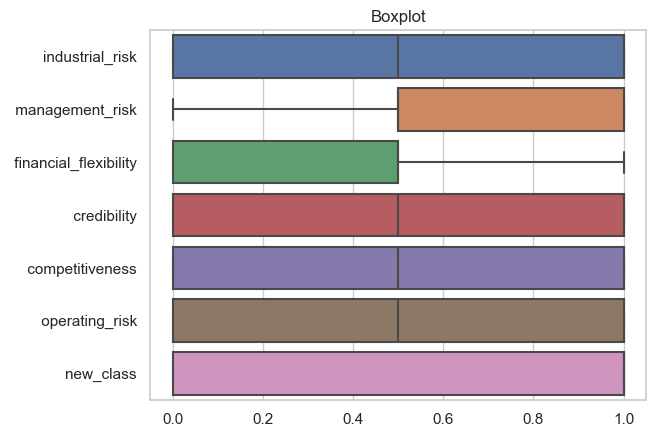

In [12]:
sns.set(style = 'whitegrid')
plt.title('Boxplot')
sns.boxplot(bankruptcy_new , orient = 'h');

In [13]:
# To check for correlations
bankruptcy_new.corr()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,new_class
industrial_risk,1.000000,0.255127,-0.162624,-0.014438,-0.257814,0.144507,-0.227823
management_risk,0.255127,1.000000,-0.254845,-0.303341,-0.306568,0.213874,-0.370838
financial_flexibility,-0.162624,-0.254845,1.000000,0.524951,0.686612,-0.116903,0.751020
credibility,-0.014438,-0.303341,0.524951,1.000000,0.675689,-0.288458,0.755909
competitiveness,-0.257814,-0.306568,0.686612,0.675689,1.000000,-0.211383,0.899452
operating_risk,0.144507,0.213874,-0.116903,-0.288458,-0.211383,1.000000,-0.279786
new_class,-0.227823,-0.370838,0.751020,0.755909,0.899452,-0.279786,1.000000


- Correlation Heatmap :

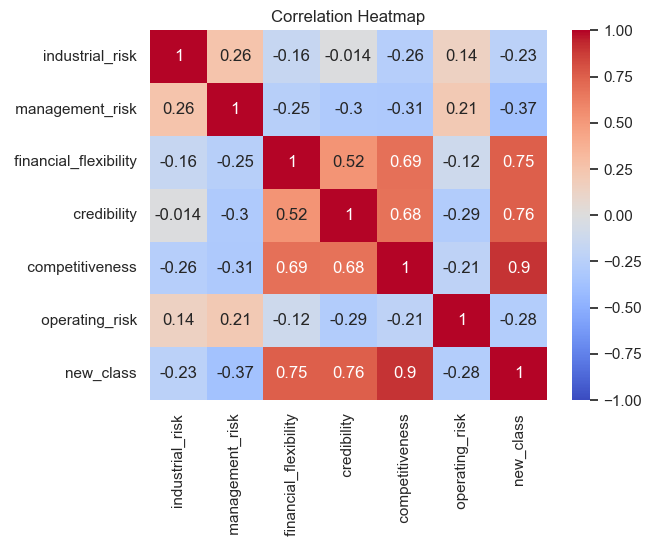

In [14]:
sns.heatmap(bankruptcy_new.corr() , vmin = -1 , vmax = 1 , annot = True , cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show();

- Pairplot :

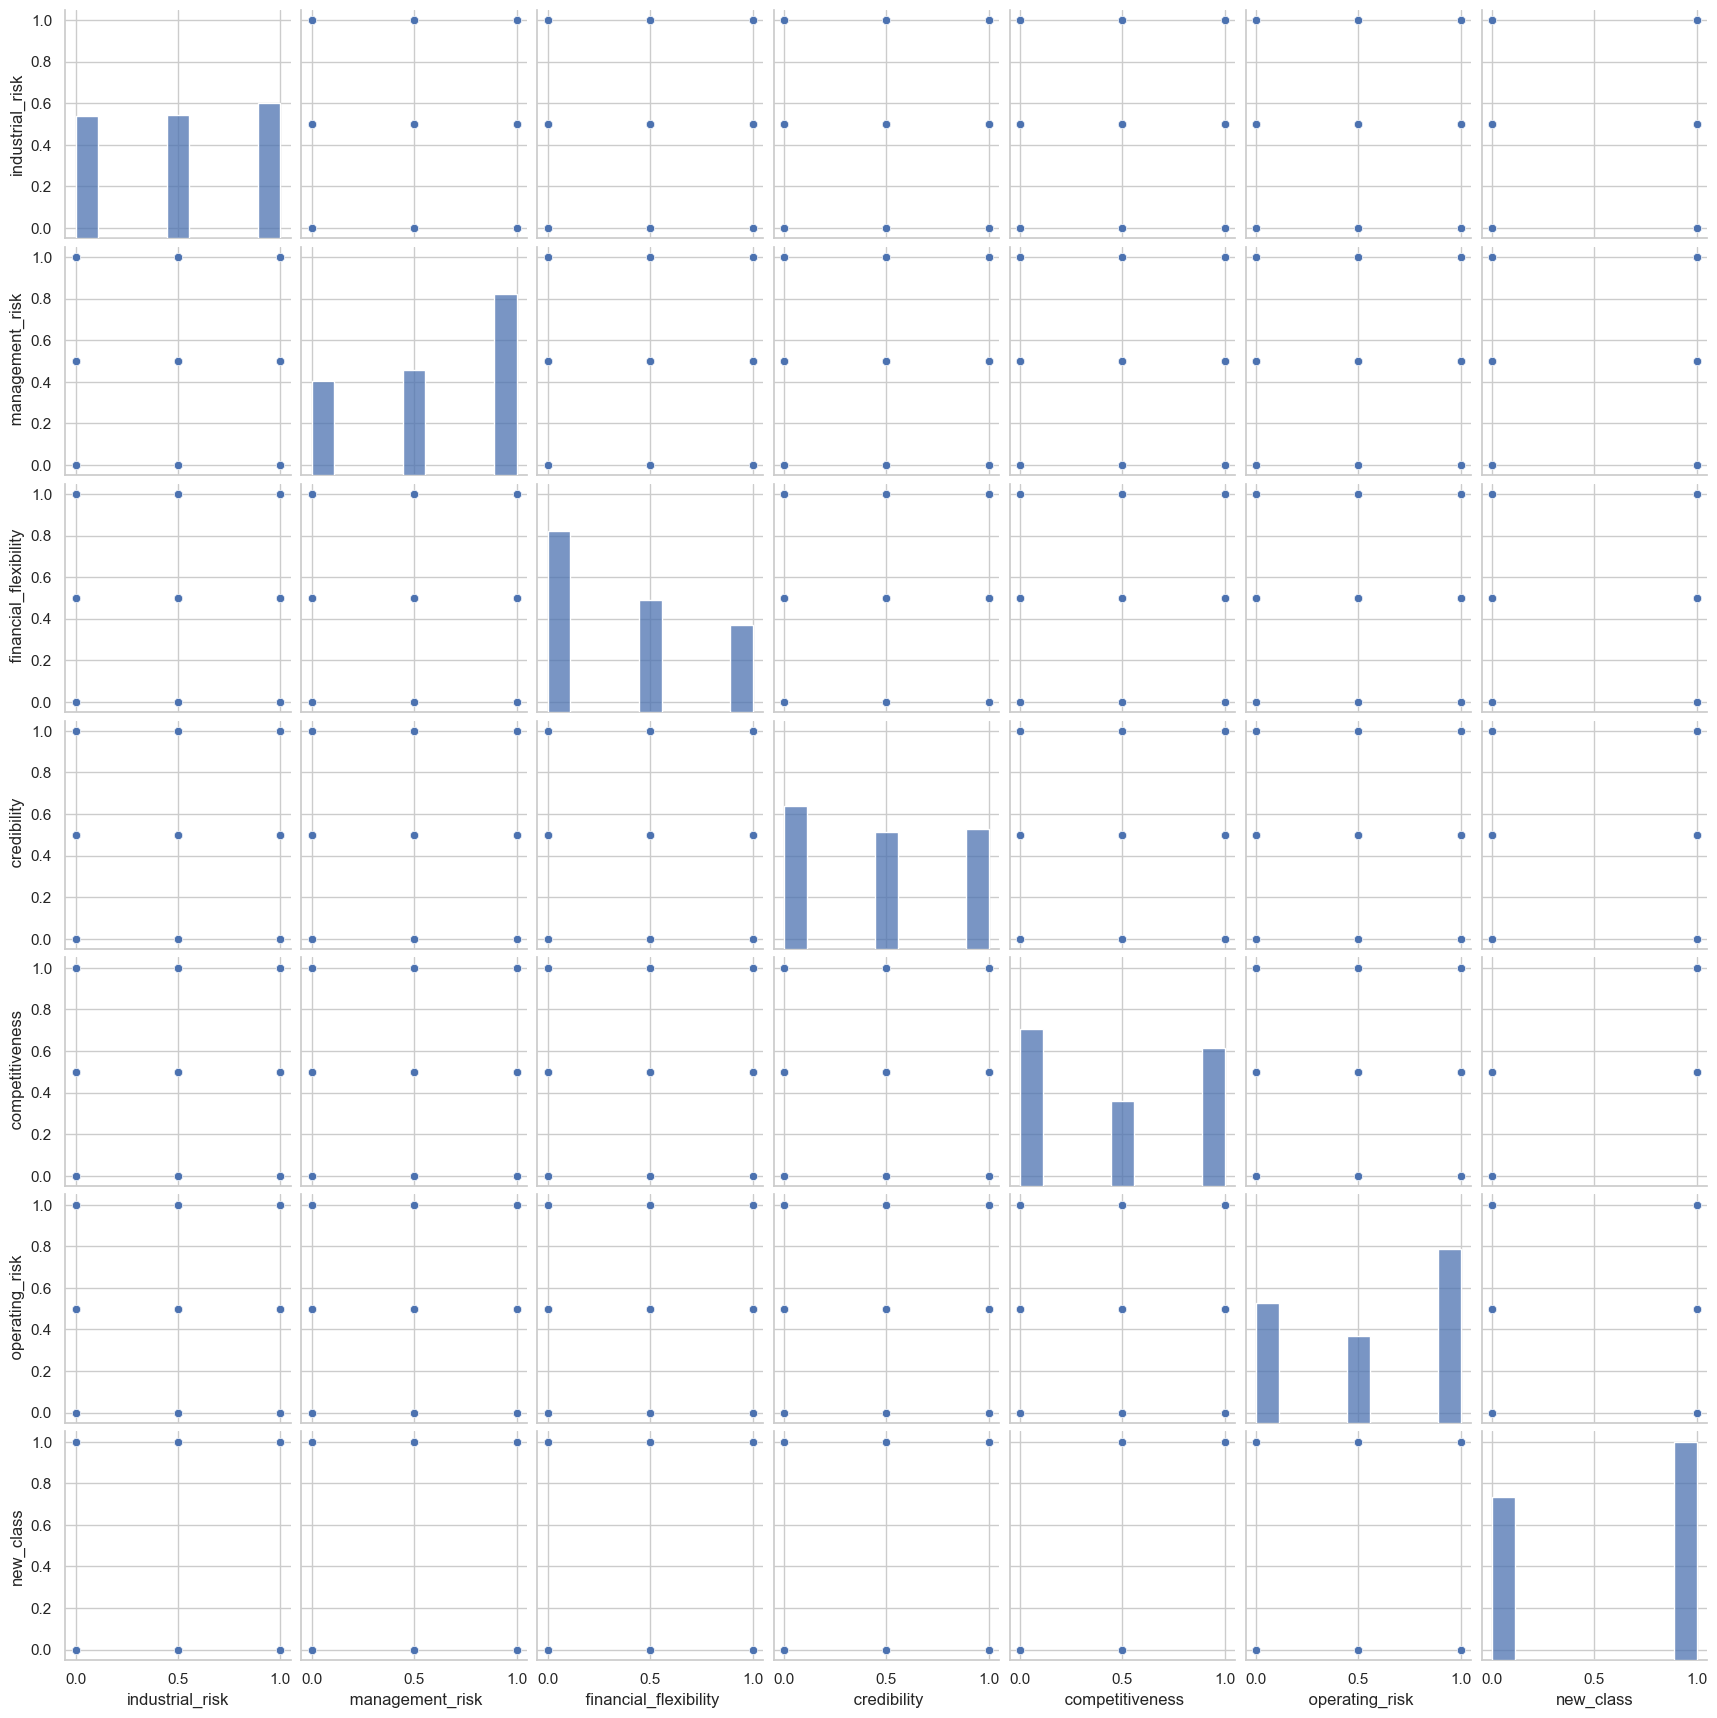

In [15]:
sns.pairplot(bankruptcy_new)
plt.show();

- Univariate Histogram :

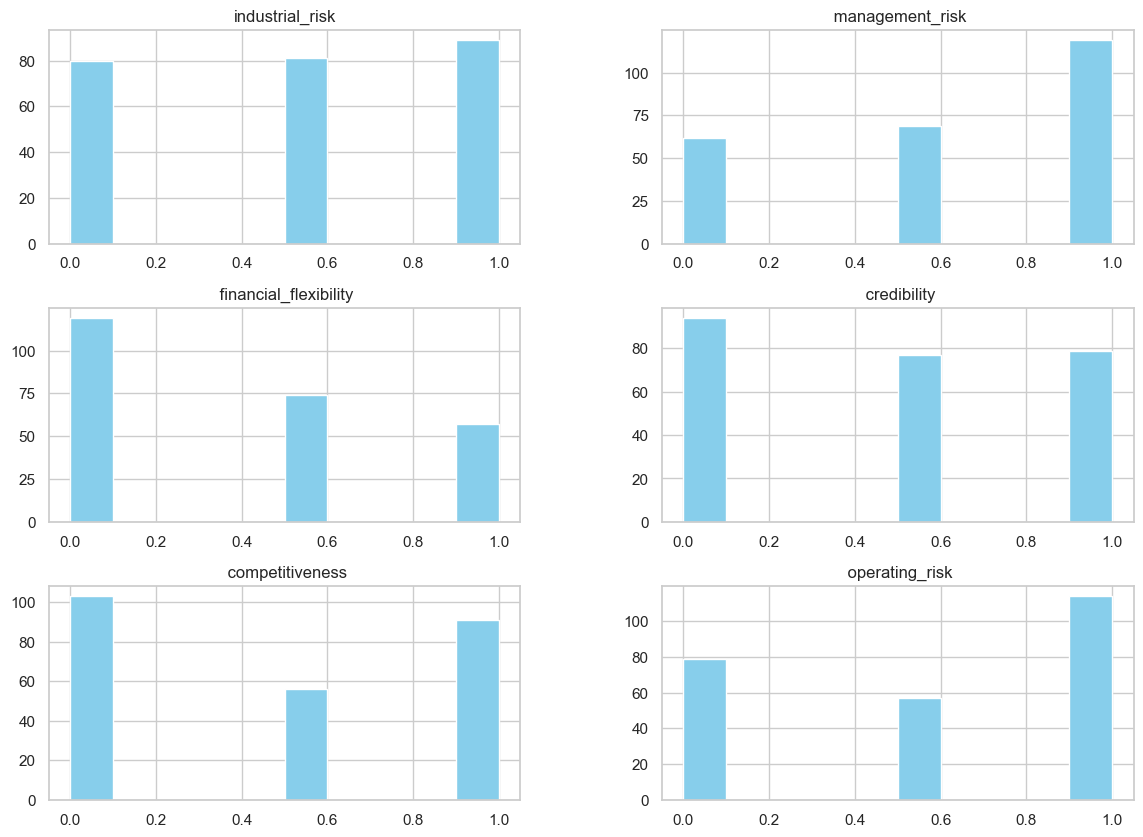

In [16]:
data = bankruptcy_new.iloc[0: , :6]
data.hist(figsize = (14 , 10) , color = 'skyblue')
plt.show ;

- Countplot :

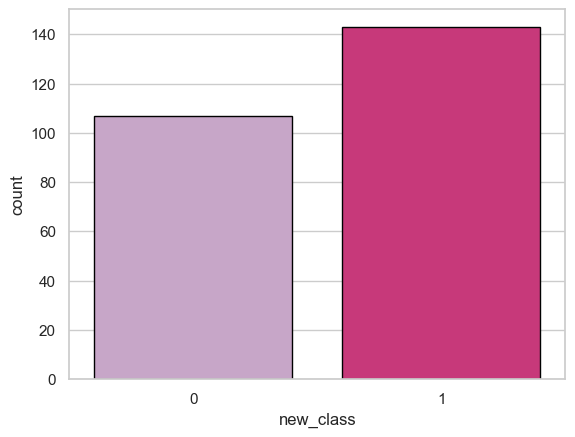

In [17]:
sns.countplot(x = 'new_class' , data = bankruptcy_new , palette = 'PuRd' , edgecolor = 'Black' );

In [18]:
bankruptcy_new.columns

Index(['industrial_risk', ' management_risk', ' financial_flexibility',
       ' credibility', ' competitiveness', ' operating_risk', 'new_class'],
      dtype='object')

- Barplots :

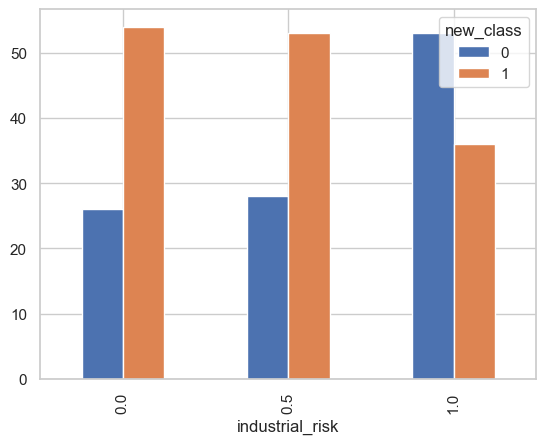

In [19]:
pd.crosstab(bankruptcy_new['industrial_risk'] , bankruptcy_new['new_class']).plot(kind = 'bar');

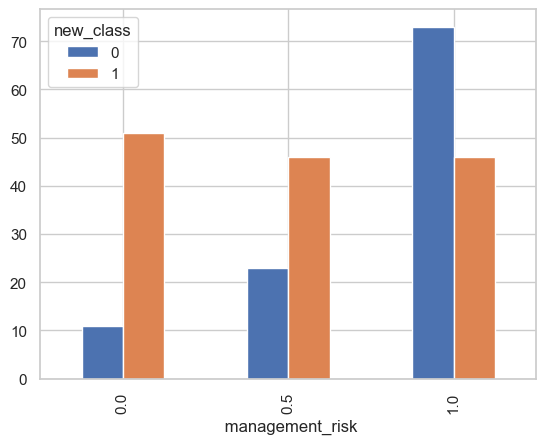

In [20]:
pd.crosstab(bankruptcy_new[' management_risk'] , bankruptcy_new['new_class']).plot(kind = 'bar');

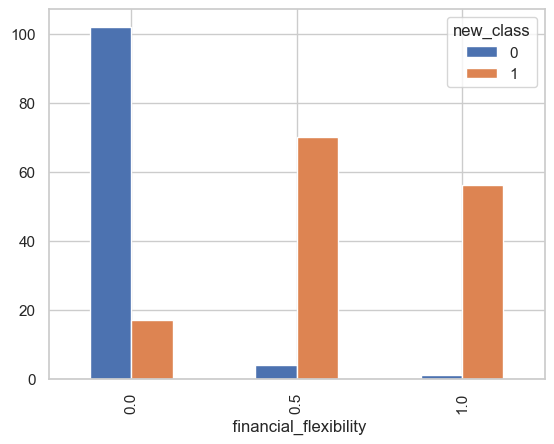

In [21]:
pd.crosstab(bankruptcy_new[' financial_flexibility'] , bankruptcy_new['new_class']).plot(kind = 'bar');

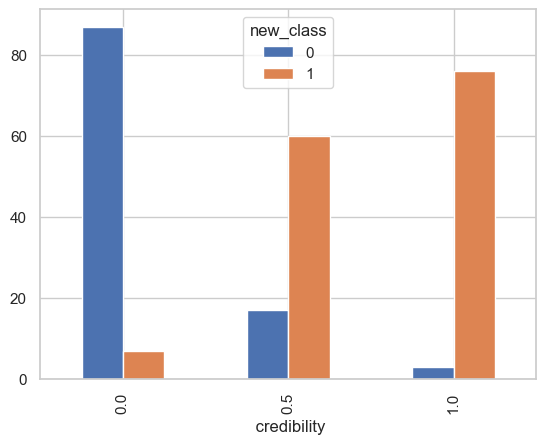

In [22]:
pd.crosstab(bankruptcy_new[' credibility'] , bankruptcy_new['new_class']).plot(kind = 'bar');

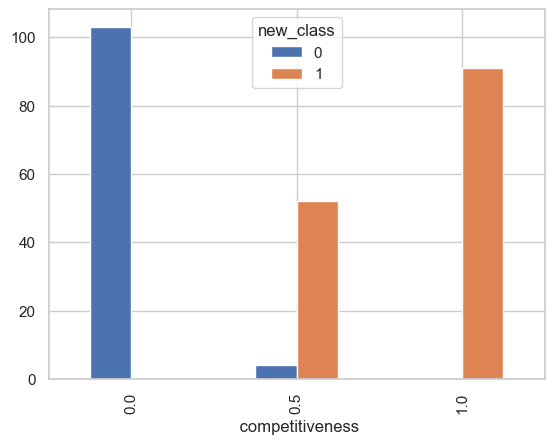

In [23]:
pd.crosstab(bankruptcy_new[' competitiveness'] , bankruptcy_new['new_class']).plot(kind = 'bar');

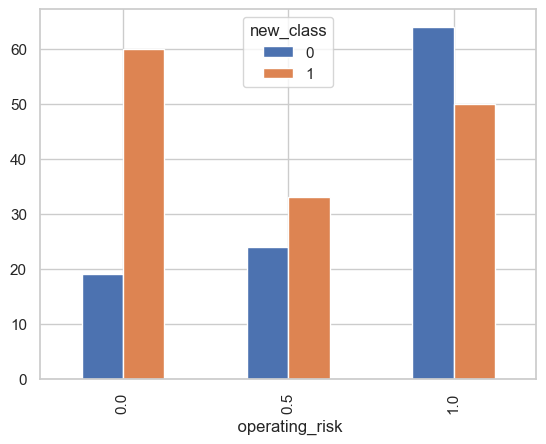

In [24]:
pd.crosstab(bankruptcy_new[' operating_risk'] , bankruptcy_new['new_class']).plot(kind = 'bar');

# Model Building
After the EDA, we will proceed with training different machine learning models with the data. The training is done by splitting the data into training and testing sets. The key metric to determine the best model in case of classification problems is the **F1 Score**. So the models with highest training and testing F1 Scores will be chosen as the best ones.

## Importing the libraries

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, classification_report, roc_auc_score, roc_curve

In [26]:
bankruptcy = pd.read_csv(r"C:\Users\dipen\Documents\A Saloni\Data Science\2. Data Science Project\dataset.csv" , sep = ';')
bankruptcy

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,non-bankruptcy
246,1.0,1.0,0.5,1.0,1.0,0.0,non-bankruptcy
247,0.0,1.0,1.0,0.5,0.5,0.0,non-bankruptcy
248,1.0,0.0,0.5,1.0,0.5,0.0,non-bankruptcy


In [27]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
bankruptcy['new_class'] = le.fit_transform(bankruptcy[' class'])
bankruptcy

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class,new_class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy,0
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy,0
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy,0
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy,0
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy,0
...,...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,non-bankruptcy,1
246,1.0,1.0,0.5,1.0,1.0,0.0,non-bankruptcy,1
247,0.0,1.0,1.0,0.5,0.5,0.0,non-bankruptcy,1
248,1.0,0.0,0.5,1.0,0.5,0.0,non-bankruptcy,1


In [28]:
x = bankruptcy.iloc[:, :-2]
y = bankruptcy[['new_class']]

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

## Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=500)
model.fit(x_train, y_train)

LogisticRegression(max_iter=500)

In [31]:
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

log_train_acc = accuracy_score(y_train, y_pred_train)
log_test_acc = accuracy_score(y_test, y_pred_test)

log_train_f1 = f1_score(y_train, y_pred_train)
log_test_f1 = f1_score(y_test, y_pred_test)

log_train_prec = precision_score(y_train, y_pred_train)
log_test_prec = precision_score(y_test, y_pred_test)

log_train_roc = roc_auc_score(y_train, y_pred_train)
log_test_roc = roc_auc_score(y_test, y_pred_test)

log_train_cm = confusion_matrix(y_train, y_pred_train)
log_test_cm = confusion_matrix(y_test, y_pred_test)

print('Logistic Regression training accuracy is', log_train_acc)
print('Logistic Regression testing accuracy is', log_test_acc)
print('--------------------------------------------------------')
print('Logistic Regression training F1 Score is', log_train_f1)
print('Logistic Regression testing F1 Score is', log_test_f1)
print('--------------------------------------------------------')
print('Logistic Regression training Precision is', log_train_prec)
print('Logistic Regression testing Precision is', log_test_prec)
print('--------------------------------------------------------')
print('Logistic Regression training ROC-AUC Score is', log_train_roc)
print('Logistic Regression testing ROC-AUC Score is', log_test_roc)
print('--------------------------------------------------------')
print('Logistic Regression training Confusion Matrix is')
print(log_train_cm)
print('--------------------------------------------------------')
print('Logistic Regression testing Confusion Matrix is')
print(log_test_cm)

Logistic Regression training accuracy is 0.9942857142857143
Logistic Regression testing accuracy is 1.0
--------------------------------------------------------
Logistic Regression training F1 Score is 0.9949748743718593
Logistic Regression testing F1 Score is 1.0
--------------------------------------------------------
Logistic Regression training Precision is 0.99
Logistic Regression testing Precision is 1.0
--------------------------------------------------------
Logistic Regression training ROC-AUC Score is 0.9934210526315789
Logistic Regression testing ROC-AUC Score is 1.0
--------------------------------------------------------
Logistic Regression training Confusion Matrix is
[[75  1]
 [ 0 99]]
--------------------------------------------------------
Logistic Regression testing Confusion Matrix is
[[31  0]
 [ 0 44]]


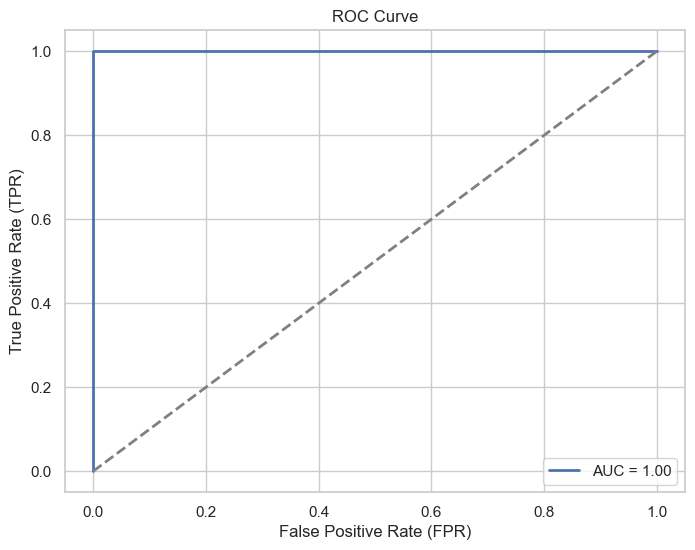

In [32]:
# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', lw=2, label=f'AUC = {log_test_roc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## Decision Tree Model
This model works on the construction of trees that contains different branches at different splits. And these branches contains leaves or nodes which are the end points. A split occurs at a node based on a certain condition which the model will make based on the data.

This model is normally used for classification purposes. But it can also be used for regression.

In [33]:
from sklearn.tree import DecisionTreeClassifier
dec = DecisionTreeClassifier(max_depth=5)
dec.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [34]:
y_pred_train = dec.predict(x_train)
y_pred_test = dec.predict(x_test)

dec_train_acc = accuracy_score(y_train, y_pred_train)
dec_test_acc = accuracy_score(y_test, y_pred_test)

dec_train_f1 = f1_score(y_train, y_pred_train)
dec_test_f1 = f1_score(y_test, y_pred_test)

dec_train_prec = precision_score(y_train, y_pred_train)
dec_test_prec = precision_score(y_test, y_pred_test)

dec_train_roc = roc_auc_score(y_train, y_pred_train)
dec_test_roc = roc_auc_score(y_test, y_pred_test)

dec_train_cm = confusion_matrix(y_train, y_pred_train)
dec_test_cm = confusion_matrix(y_test, y_pred_test)

print('Decision tree training accuracy is', dec_train_acc)
print('Decision tree testing accuracy is', dec_test_acc)
print(" ")
print('Decision tree training F1 Score is', dec_train_f1)
print('Decision tree testing F1 Score is', dec_test_f1)
print(" ")
print('Decision tree training Precision is', dec_train_prec)
print('Decision tree testing Precision is', dec_test_prec)
print(" ")
print('Decision tree training ROC-AUC Score is', dec_train_roc)
print('Decision tree testing ROC-AUC Score is', dec_test_roc)
print(" ")
print('Decision tree training Confusion Matrix is')
print(dec_train_cm)
print(" ")
print('Decision tree testing Confusion Matrix is')
print(dec_test_cm)

Decision tree training accuracy is 1.0
Decision tree testing accuracy is 1.0
 
Decision tree training F1 Score is 1.0
Decision tree testing F1 Score is 1.0
 
Decision tree training Precision is 1.0
Decision tree testing Precision is 1.0
 
Decision tree training ROC-AUC Score is 1.0
Decision tree testing ROC-AUC Score is 1.0
 
Decision tree training Confusion Matrix is
[[76  0]
 [ 0 99]]
 
Decision tree testing Confusion Matrix is
[[31  0]
 [ 0 44]]


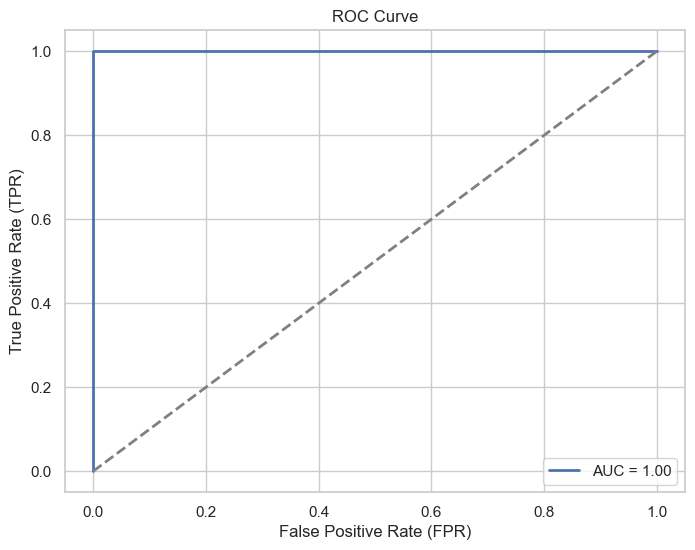

In [35]:
# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', lw=2, label=f'AUC = {dec_test_roc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## KNN Classifier

In [36]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [37]:
y_pred_train = knn.predict(x_train)
y_pred_test = knn.predict(x_test)

knn_train_acc = accuracy_score(y_train, y_pred_train)
knn_test_acc = accuracy_score(y_test, y_pred_test)

knn_train_f1 = f1_score(y_train, y_pred_train)
knn_test_f1 = f1_score(y_test, y_pred_test)

knn_train_prec = precision_score(y_train, y_pred_train)
knn_test_prec = precision_score(y_test, y_pred_test)

knn_train_roc = roc_auc_score(y_train, y_pred_train)
knn_test_roc = roc_auc_score(y_test, y_pred_test)

knn_train_cm = confusion_matrix(y_train, y_pred_train)
knn_test_cm = confusion_matrix(y_test, y_pred_test)

print('KNN training accuracy is', knn_train_acc)
print('KNN testing accuracy is', knn_test_acc)
print(" ")
print('KNN training F1 Score is', knn_train_f1)
print('KNN testing F1 Score is', knn_test_f1)
print(" ")
print('KNN training Precision is', knn_train_prec)
print('KNN testing Precision is', knn_test_prec)
print(" ")
print('KNN training ROC-AUC Score is', knn_train_roc)
print('KNN testing ROC-AUC Score is', knn_test_roc)
print(" ")
print('KNN training Confusion Matrix is')
print(knn_train_cm)
print(" ")
print('KNN testing Confusion Matrix is')
print(knn_test_cm)

KNN training accuracy is 1.0
KNN testing accuracy is 1.0
 
KNN training F1 Score is 1.0
KNN testing F1 Score is 1.0
 
KNN training Precision is 1.0
KNN testing Precision is 1.0
 
KNN training ROC-AUC Score is 1.0
KNN testing ROC-AUC Score is 1.0
 
KNN training Confusion Matrix is
[[76  0]
 [ 0 99]]
 
KNN testing Confusion Matrix is
[[31  0]
 [ 0 44]]


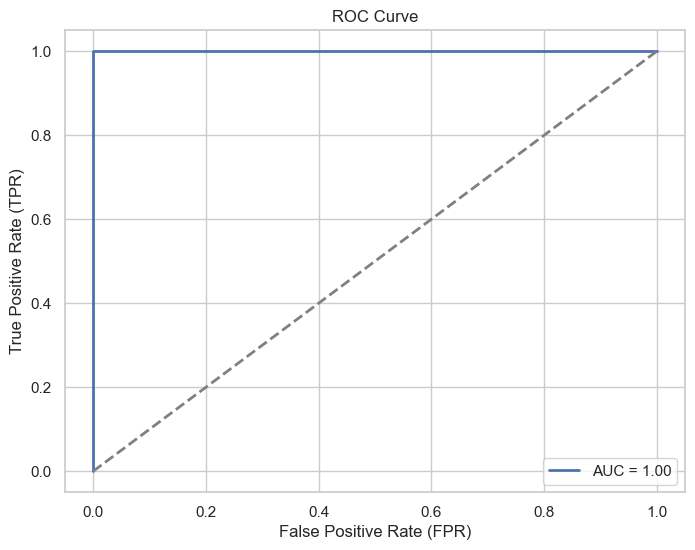

In [38]:
# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', lw=2, label=f'AUC = {knn_test_roc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## Random Forest Classifier

In [39]:
from sklearn.ensemble import RandomForestClassifier
rnd = RandomForestClassifier(max_depth=5)
rnd.fit(x_train, y_train)

RandomForestClassifier(max_depth=5)

In [40]:
y_pred_train = rnd.predict(x_train)
y_pred_test = rnd.predict(x_test)

rnd_train_acc = accuracy_score(y_train, y_pred_train)
rnd_test_acc = accuracy_score(y_test, y_pred_test)

rnd_train_f1 = f1_score(y_train, y_pred_train)
rnd_test_f1 = f1_score(y_test, y_pred_test)

rnd_train_prec = precision_score(y_train, y_pred_train)
rnd_test_prec = precision_score(y_test, y_pred_test)

rnd_train_roc = roc_auc_score(y_train, y_pred_train)
rnd_test_roc = roc_auc_score(y_test, y_pred_test)

rnd_train_cm = confusion_matrix(y_train, y_pred_train)
rnd_test_cm = confusion_matrix(y_test, y_pred_test)

print('Random Forest training accuracy is', rnd_train_acc)
print('Random Forest testing accuracy is', rnd_test_acc)
print(" ")
print('Random Forest training F1 Score is', rnd_train_f1)
print('Random Forest testing F1 Score is', rnd_test_f1)
print(" ")
print('Random Forest training Precision is', rnd_train_prec)
print('Random Forest testing Precision is', rnd_test_prec)
print(" ")
print('Random Forest training ROC-AUC Score is', rnd_train_roc)
print('Random Forest testing ROC-AUC Score is', rnd_test_roc)
print(" ")
print('Random Forest training Confusion Matrix is')
print(rnd_train_cm)
print(" ")
print('Random Forest testing Confusion Matrix is')
print(rnd_test_cm)

Random Forest training accuracy is 1.0
Random Forest testing accuracy is 1.0
 
Random Forest training F1 Score is 1.0
Random Forest testing F1 Score is 1.0
 
Random Forest training Precision is 1.0
Random Forest testing Precision is 1.0
 
Random Forest training ROC-AUC Score is 1.0
Random Forest testing ROC-AUC Score is 1.0
 
Random Forest training Confusion Matrix is
[[76  0]
 [ 0 99]]
 
Random Forest testing Confusion Matrix is
[[31  0]
 [ 0 44]]


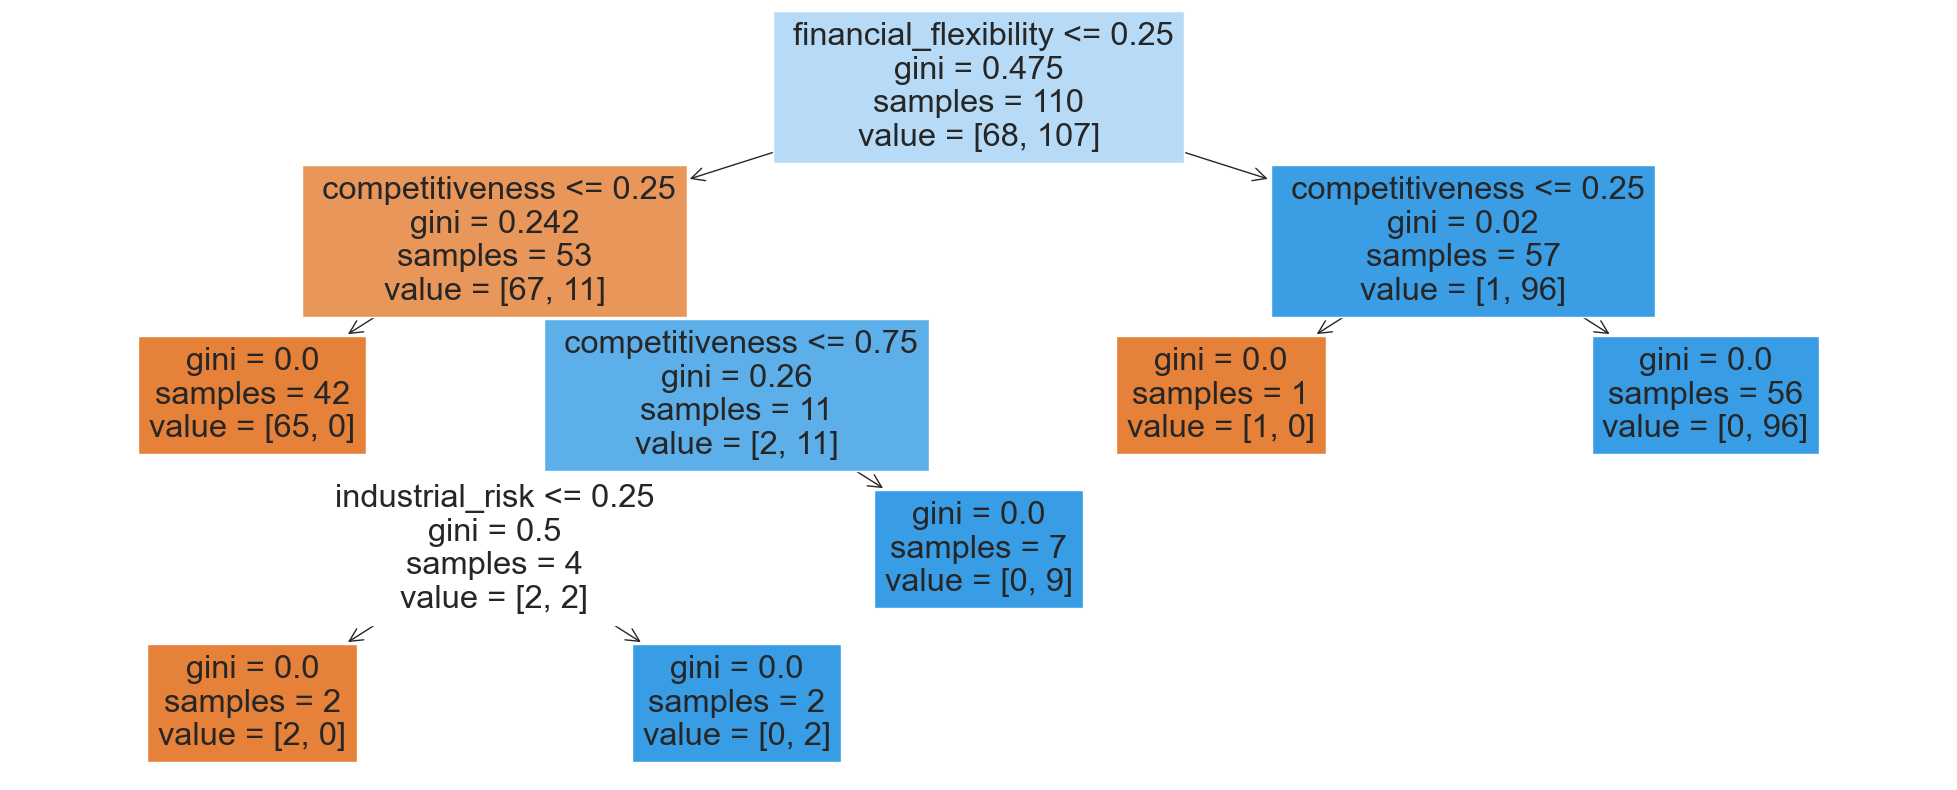

In [41]:
from sklearn import tree
fig = plt.figure(figsize=(25,10))
_ = tree.plot_tree(rnd.estimators_[9], feature_names= list(x),filled=True, max_depth=5)

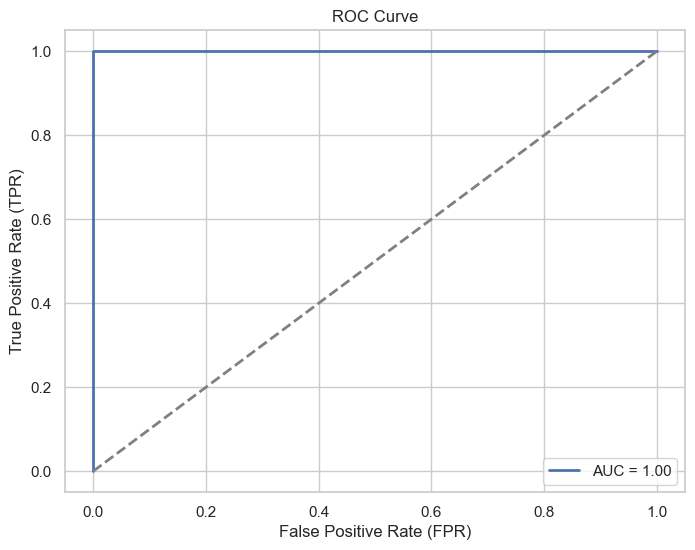

In [42]:
# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', lw=2, label=f'AUC = {rnd_test_roc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [43]:
import pickle

In [44]:
pickle.dump(rnd,open('rnd.pkl','wb'))

## Bagging Classifier

In [45]:
from sklearn.ensemble import BaggingClassifier
bag = BaggingClassifier(estimator=RandomForestClassifier(max_depth = 5), n_estimators=10)
bag.fit(x_train, y_train)

BaggingClassifier(estimator=RandomForestClassifier(max_depth=5))

In [46]:
y_pred_train = bag.predict(x_train)
y_pred_test = bag.predict(x_test)

bag_train_acc = accuracy_score(y_train, y_pred_train)
bag_test_acc = accuracy_score(y_test, y_pred_test)

bag_train_f1 = f1_score(y_train, y_pred_train)
bag_test_f1 = f1_score(y_test, y_pred_test)

bag_train_prec = precision_score(y_train, y_pred_train)
bag_test_prec = precision_score(y_test, y_pred_test)

bag_train_roc = roc_auc_score(y_train, y_pred_train)
bag_test_roc = roc_auc_score(y_test, y_pred_test)

bag_train_cm = confusion_matrix(y_train, y_pred_train)
bag_test_cm = confusion_matrix(y_test, y_pred_test)

print('Bagging training accuracy is', bag_train_acc)
print('Bagging testing accuracy is', bag_test_acc)
print(" ")
print('Bagging training F1 Score is', bag_train_f1)
print('Bagging testing F1 Score is', bag_test_f1)
print(" ")
print('Bagging training Precision is', bag_train_prec)
print('Bagging testing Precision is', bag_test_prec)
print(" ")
print('Bagging training ROC-AUC Score is', bag_train_roc)
print('Bagging testing ROC-AUC Score is', bag_test_roc)
print(" ")
print('Bagging training Confusion Matrix is')
print(bag_train_cm)
print(" ")
print('Bagging testing Confusion Matrix is')
print(bag_test_cm)

Bagging training accuracy is 1.0
Bagging testing accuracy is 1.0
 
Bagging training F1 Score is 1.0
Bagging testing F1 Score is 1.0
 
Bagging training Precision is 1.0
Bagging testing Precision is 1.0
 
Bagging training ROC-AUC Score is 1.0
Bagging testing ROC-AUC Score is 1.0
 
Bagging training Confusion Matrix is
[[76  0]
 [ 0 99]]
 
Bagging testing Confusion Matrix is
[[31  0]
 [ 0 44]]


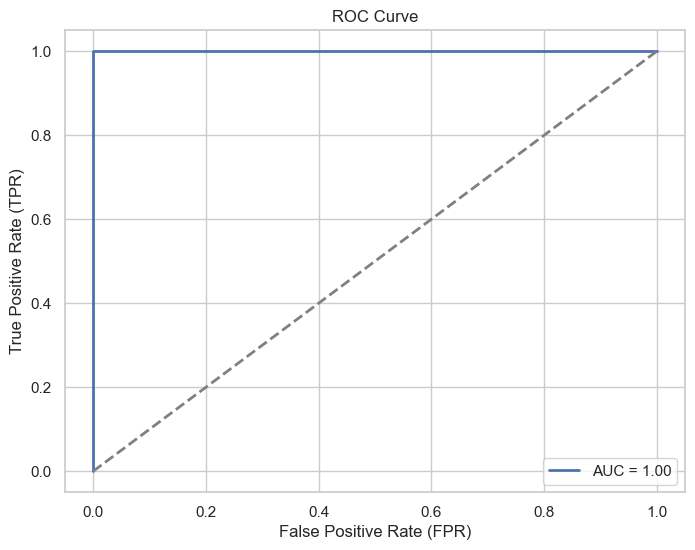

In [47]:
# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', lw=2, label=f'AUC = {bag_test_roc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## AdaBoost
This is another ensemble technique that assigns the weights to the parameters depending the errors. Higher weights are assigned to the incorrect predictions and lower weights are assigned to the correct predictions in each iteration. This will help it reach the convergence much faster.

In [48]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(estimator=RandomForestClassifier(max_depth=5))
ada.fit(x_train, y_train)

AdaBoostClassifier(estimator=RandomForestClassifier(max_depth=5))

In [49]:
y_pred_train = ada.predict(x_train)
y_pred_test = ada.predict(x_test)

ada_train_acc = accuracy_score(y_train, y_pred_train)
ada_test_acc = accuracy_score(y_test, y_pred_test)

ada_train_f1 = f1_score(y_train, y_pred_train)
ada_test_f1 = f1_score(y_test, y_pred_test)

ada_train_prec = precision_score(y_train, y_pred_train)
ada_test_prec = precision_score(y_test, y_pred_test)

ada_train_roc = roc_auc_score(y_train, y_pred_train)
ada_test_roc = roc_auc_score(y_test, y_pred_test)

ada_train_cm = confusion_matrix(y_train, y_pred_train)
ada_test_cm = confusion_matrix(y_test, y_pred_test)

print('AdaBoost training accuracy is', ada_train_acc)
print('AdaBoost testing accuracy is', ada_test_acc)
print(" ")
print('AdaBoost training F1 Score is', ada_train_f1)
print('AdaBoost testing F1 Score is', ada_test_f1)
print(" ")
print('AdaBoost training Precision is', ada_train_prec)
print('AdaBoost testing Precision is', ada_test_prec)
print(" ")
print('AdaBoost training ROC-AUC Score is', ada_train_roc)
print('AdaBoost testing ROC-AUC Score is', ada_test_roc)
print(" ")
print('AdaBoost training Confusion Matrix is')
print(ada_train_cm)
print(" ")
print('AdaBoost testing Confusion Matrix is')
print(ada_test_cm)

AdaBoost training accuracy is 1.0
AdaBoost testing accuracy is 1.0
 
AdaBoost training F1 Score is 1.0
AdaBoost testing F1 Score is 1.0
 
AdaBoost training Precision is 1.0
AdaBoost testing Precision is 1.0
 
AdaBoost training ROC-AUC Score is 1.0
AdaBoost testing ROC-AUC Score is 1.0
 
AdaBoost training Confusion Matrix is
[[76  0]
 [ 0 99]]
 
AdaBoost testing Confusion Matrix is
[[31  0]
 [ 0 44]]


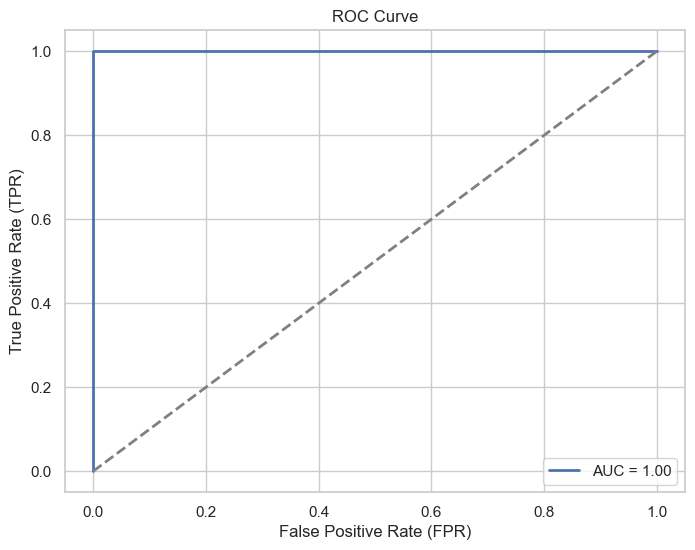

In [50]:
# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', lw=2, label=f'AUC = {ada_test_roc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## Gradient Boosting Classifier
This is an ensemble technique that uses the Gradient Descent algorithm in changing the weights.

In [51]:
from sklearn.ensemble import GradientBoostingClassifier
grad = GradientBoostingClassifier(learning_rate=0.01)
grad.fit(x_train, y_train)

GradientBoostingClassifier(learning_rate=0.01)

In [52]:
y_pred_train = grad.predict(x_train)
y_pred_test = grad.predict(x_test)

grad_train_acc = accuracy_score(y_train, y_pred_train)
grad_test_acc = accuracy_score(y_test, y_pred_test)

grad_train_f1 = f1_score(y_train, y_pred_train)
grad_test_f1 = f1_score(y_test, y_pred_test)

grad_train_prec = precision_score(y_train, y_pred_train)
grad_test_prec = precision_score(y_test, y_pred_test)

grad_train_roc = roc_auc_score(y_train, y_pred_train)
grad_test_roc = roc_auc_score(y_test, y_pred_test)

grad_train_cm = confusion_matrix(y_train, y_pred_train)
grad_test_cm = confusion_matrix(y_test, y_pred_test)

print('Gradient Boost training accuracy is', grad_train_acc)
print('Gradient Boost testing accuracy is', grad_test_acc)
print(" ")
print('Gradient Boost training F1 Score is', grad_train_f1)
print('Gradient Boost testing F1 Score is', grad_test_f1)
print(" ")
print('Gradient Boost training Precision is', grad_train_prec)
print('Gradient Boost testing Precision is', grad_test_prec)
print(" ")
print('Gradient Boost training ROC-AUC Score is', grad_train_roc)
print('Gradient Boost testing ROC-AUC Score is', grad_test_roc)
print(" ")
print('Gradient Boost training Confusion Matrix is')
print(grad_train_cm)
print(" ")
print('Gradient Boost testing Confusion Matrix is')
print(grad_test_cm)

Gradient Boost training accuracy is 1.0
Gradient Boost testing accuracy is 1.0
 
Gradient Boost training F1 Score is 1.0
Gradient Boost testing F1 Score is 1.0
 
Gradient Boost training Precision is 1.0
Gradient Boost testing Precision is 1.0
 
Gradient Boost training ROC-AUC Score is 1.0
Gradient Boost testing ROC-AUC Score is 1.0
 
Gradient Boost training Confusion Matrix is
[[76  0]
 [ 0 99]]
 
Gradient Boost testing Confusion Matrix is
[[31  0]
 [ 0 44]]


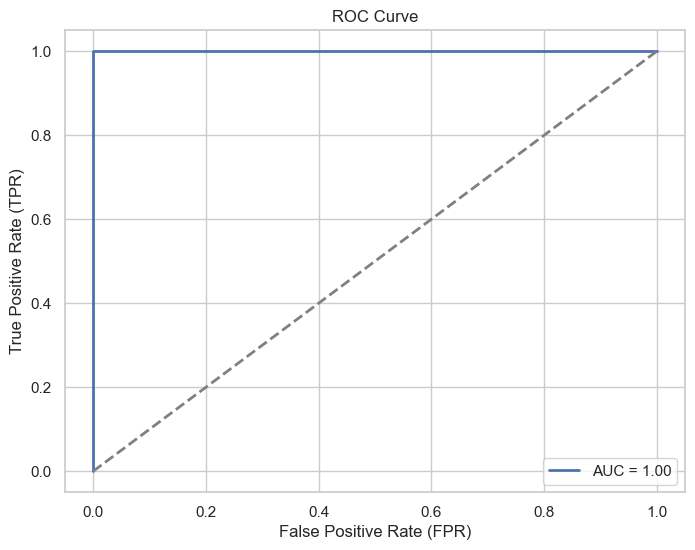

In [53]:
# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', lw=2, label=f'AUC = {grad_test_roc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## SVM
This model uses the support vector concept. There are 3 kernels which are linear, polynomial, and rbf.

### Linear Kernel

In [54]:
from sklearn.svm import SVC

svcl = SVC(kernel= "linear")
svcl.fit(x_train , y_train)

SVC(kernel='linear')

In [55]:
y_pred_train = svcl.predict(x_train)
y_pred_test = svcl.predict(x_test)

svcl_train_acc = accuracy_score(y_train, y_pred_train)
svcl_test_acc = accuracy_score(y_test, y_pred_test)

svcl_train_f1 = f1_score(y_train, y_pred_train)
svcl_test_f1 = f1_score(y_test, y_pred_test)

svcl_train_prec = precision_score(y_train, y_pred_train)
svcl_test_prec = precision_score(y_test, y_pred_test)

svcl_train_roc = roc_auc_score(y_train, y_pred_train)
svcl_test_roc = roc_auc_score(y_test, y_pred_test)

svcl_train_cm = confusion_matrix(y_train, y_pred_train)
svcl_test_cm = confusion_matrix(y_test, y_pred_test)

print('SVC Linear Kernel training accuracy is', svcl_train_acc)
print('SVC Linear Kernel testing accuracy is', svcl_test_acc)
print(" ")
print('SVC Linear Kernel training F1 Score is', svcl_train_f1)
print('SVC Linear Kernel testing F1 Score is', svcl_test_f1)
print(" ")
print('SVC Linear Kernel training Precision is', svcl_train_prec)
print('SVC Linear Kernel testing Precision is', svcl_test_prec)
print(" ")
print('SVC Linear Kernel training ROC-AUC Score is', svcl_train_roc)
print('SVC Linear Kernel testing ROC-AUC Score is', svcl_test_roc)
print(" ")
print('SVC Linear Kernel training Confusion Matrix is')
print(svcl_train_cm)
print(" ")
print('SVC Linear Kernel testing Confusion Matrix is')
print(svcl_test_cm)

SVC Linear Kernel training accuracy is 0.9942857142857143
SVC Linear Kernel testing accuracy is 1.0
 
SVC Linear Kernel training F1 Score is 0.9949748743718593
SVC Linear Kernel testing F1 Score is 1.0
 
SVC Linear Kernel training Precision is 0.99
SVC Linear Kernel testing Precision is 1.0
 
SVC Linear Kernel training ROC-AUC Score is 0.9934210526315789
SVC Linear Kernel testing ROC-AUC Score is 1.0
 
SVC Linear Kernel training Confusion Matrix is
[[75  1]
 [ 0 99]]
 
SVC Linear Kernel testing Confusion Matrix is
[[31  0]
 [ 0 44]]


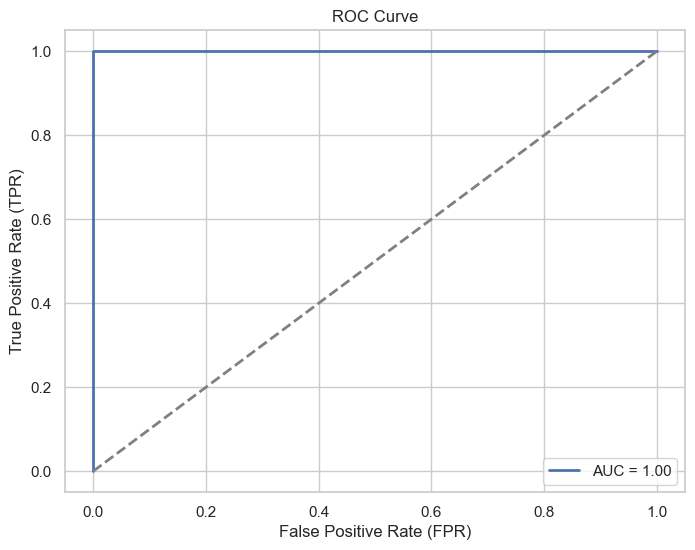

In [56]:
# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', lw=2, label=f'AUC = {svcl_test_roc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

### Polynomial Kernel

In [57]:
svcp = SVC(kernel= "poly")
svcp.fit(x_train , y_train)

SVC(kernel='poly')

In [58]:
y_pred_train = svcp.predict(x_train)
y_pred_test = svcp.predict(x_test)

svcp_train_acc = accuracy_score(y_train, y_pred_train)
svcp_test_acc = accuracy_score(y_test, y_pred_test)

svcp_train_f1 = f1_score(y_train, y_pred_train)
svcp_test_f1 = f1_score(y_test, y_pred_test)

svcp_train_prec = precision_score(y_train, y_pred_train)
svcp_test_prec = precision_score(y_test, y_pred_test)

svcp_train_roc = roc_auc_score(y_train, y_pred_train)
svcp_test_roc = roc_auc_score(y_test, y_pred_test)

svcp_train_cm = confusion_matrix(y_train, y_pred_train)
svcp_test_cm = confusion_matrix(y_test, y_pred_test)

print('SVC Polynomial Kernel training accuracy is', svcp_train_acc)
print('SVC Polynomial Kernel testing accuracy is', svcp_test_acc)
print(" ")
print('SVC Polynomial Kernel training F1 Score is', svcp_train_f1)
print('SVC Polynomial Kernel testing F1 Score is', svcp_test_f1)
print(" ")
print('SVC Polynomial Kernel training Precision is', svcp_train_prec)
print('SVC Polynomial Kernel testing Precision is', svcp_test_prec)
print(" ")
print('SVC Polynomial Kernel training ROC-AUC Score is', svcp_train_roc)
print('SVC Polynomial Kernel testing ROC-AUC Score is', svcp_test_roc)
print(" ")
print('SVC Polynomial Kernel training Confusion Matrix is')
print(svcp_train_cm)
print(" ")
print('SVC Polynomial Kernel testing Confusion Matrix is')
print(svcp_test_cm)

SVC Polynomial Kernel training accuracy is 1.0
SVC Polynomial Kernel testing accuracy is 1.0
 
SVC Polynomial Kernel training F1 Score is 1.0
SVC Polynomial Kernel testing F1 Score is 1.0
 
SVC Polynomial Kernel training Precision is 1.0
SVC Polynomial Kernel testing Precision is 1.0
 
SVC Polynomial Kernel training ROC-AUC Score is 1.0
SVC Polynomial Kernel testing ROC-AUC Score is 1.0
 
SVC Polynomial Kernel training Confusion Matrix is
[[76  0]
 [ 0 99]]
 
SVC Polynomial Kernel testing Confusion Matrix is
[[31  0]
 [ 0 44]]


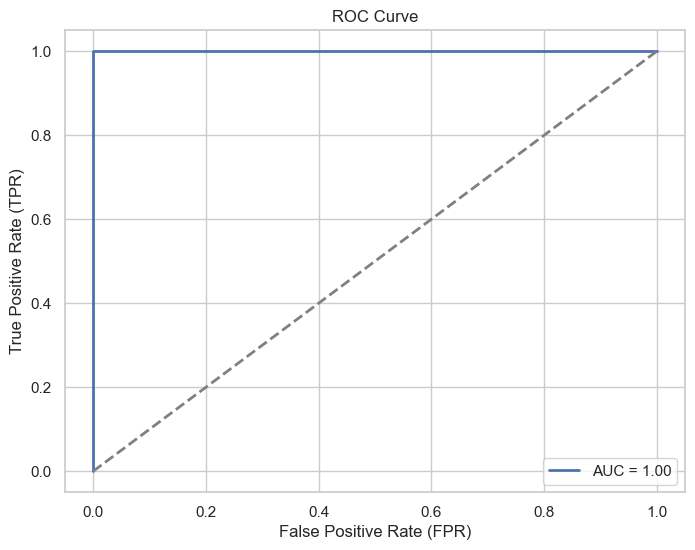

In [59]:
# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', lw=2, label=f'AUC = {svcp_test_roc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

### RBF Kernel

In [60]:
svcr = SVC(C= 20, gamma = 50)
svcr.fit(x_train , y_train)

SVC(C=20, gamma=50)

In [61]:
y_pred_train = svcr.predict(x_train)
y_pred_test = svcr.predict(x_test)

svcr_train_acc = accuracy_score(y_train, y_pred_train)
svcr_test_acc = accuracy_score(y_test, y_pred_test)

svcr_train_f1 = f1_score(y_train, y_pred_train)
svcr_test_f1 = f1_score(y_test, y_pred_test)

svcr_train_prec = precision_score(y_train, y_pred_train)
svcr_test_prec = precision_score(y_test, y_pred_test)

svcr_train_roc = roc_auc_score(y_train, y_pred_train)
svcr_test_roc = roc_auc_score(y_test, y_pred_test)

svcr_train_cm = confusion_matrix(y_train, y_pred_train)
svcr_test_cm = confusion_matrix(y_test, y_pred_test)

print('SVC RBF Kernel training accuracy is', svcr_train_acc)
print('SVC RBF Kernel testing accuracy is', svcr_test_acc)
print(" ")
print('SVC RBF Kernel training F1 Score is', svcr_train_f1)
print('SVC RBF Kernel testing F1 Score is', svcr_test_f1)
print(" ")
print('SVC RBF Kernel training Precision is', svcr_train_prec)
print('SVC RBF Kernel testing Precision is', svcr_test_prec)
print(" ")
print('SVC RBF Kernel training ROC-AUC Score is', svcr_train_roc)
print('SVC RBF Kernel testing ROC-AUC Score is', svcr_test_roc)
print(" ")
print('SVC RBF Kernel training Confusion Matrix is')
print(svcr_train_cm)
print(" ")
print('SVC RBF Kernel testing Confusion Matrix is')
print(svcr_test_cm)

SVC RBF Kernel training accuracy is 1.0
SVC RBF Kernel testing accuracy is 0.9866666666666667
 
SVC RBF Kernel training F1 Score is 1.0
SVC RBF Kernel testing F1 Score is 0.9887640449438202
 
SVC RBF Kernel training Precision is 1.0
SVC RBF Kernel testing Precision is 0.9777777777777777
 
SVC RBF Kernel training ROC-AUC Score is 1.0
SVC RBF Kernel testing ROC-AUC Score is 0.9838709677419355
 
SVC RBF Kernel training Confusion Matrix is
[[76  0]
 [ 0 99]]
 
SVC RBF Kernel testing Confusion Matrix is
[[30  1]
 [ 0 44]]


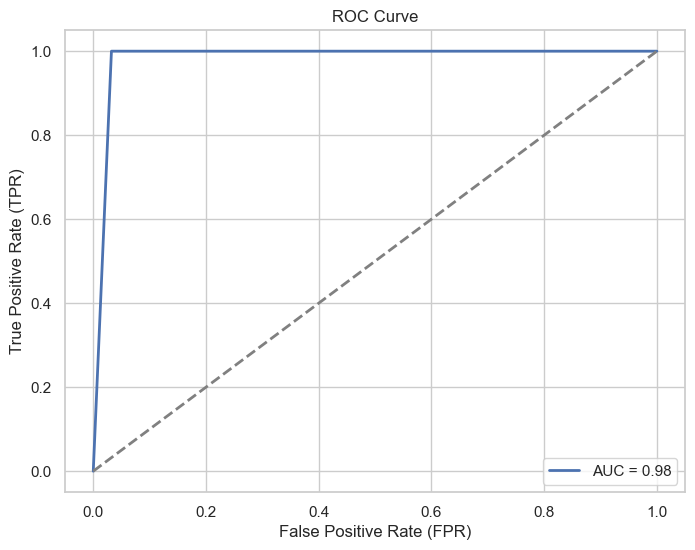

In [62]:
# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', lw=2, label=f'AUC = {svcr_test_roc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## Stacking
In this technique different types of estimators or even ensembles can be used stacked upon each other to get the results.

Here the logistic regressor, decision tree classifier, and the gradient boosting classifier are stacked together.

In [63]:
from sklearn.ensemble import StackingClassifier

estimators = [('log', LogisticRegression(max_iter=500)), ('rnd', RandomForestClassifier(max_depth=5)), ('svcr', SVC(C= 20, gamma = 50))]
stack = StackingClassifier(estimators=estimators)
stack.fit(x_train, y_train)

StackingClassifier(estimators=[('log', LogisticRegression(max_iter=500)),
                               ('rnd', RandomForestClassifier(max_depth=5)),
                               ('svcr', SVC(C=20, gamma=50))])

In [64]:
y_pred_train = stack.predict(x_train)
y_pred_test = stack.predict(x_test)

stack_train_acc = accuracy_score(y_train, y_pred_train)
stack_test_acc = accuracy_score(y_test, y_pred_test)

stack_train_f1 = f1_score(y_train, y_pred_train)
stack_test_f1 = f1_score(y_test, y_pred_test)

stack_train_prec = precision_score(y_train, y_pred_train)
stack_test_prec = precision_score(y_test, y_pred_test)

stack_train_roc = roc_auc_score(y_train, y_pred_train)
stack_test_roc = roc_auc_score(y_test, y_pred_test)

stack_train_cm = confusion_matrix(y_train, y_pred_train)
stack_test_cm = confusion_matrix(y_test, y_pred_test)

print('Stacking training accuracy is', stack_train_acc)
print('Stacking testing accuracy is', stack_test_acc)
print()
print('Stacking training F1 Score is', stack_train_f1)
print('Stacking testing F1 Score is', stack_test_f1)
print()
print('Stacking training Precision is', stack_train_prec)
print('Stacking testing Precision is', stack_test_prec)
print()
print('Stacking training ROC-AUC Score is', stack_train_roc)
print('Stacking testing ROC-AUC Score is', stack_test_roc)
print()
print('Stacking training Confusion Matrix is')
print(stack_train_cm)
print()
print('Stacking testing Confusion Matrix is')
print(stack_test_cm)

Stacking training accuracy is 1.0
Stacking testing accuracy is 1.0

Stacking training F1 Score is 1.0
Stacking testing F1 Score is 1.0

Stacking training Precision is 1.0
Stacking testing Precision is 1.0

Stacking training ROC-AUC Score is 1.0
Stacking testing ROC-AUC Score is 1.0

Stacking training Confusion Matrix is
[[76  0]
 [ 0 99]]

Stacking testing Confusion Matrix is
[[31  0]
 [ 0 44]]


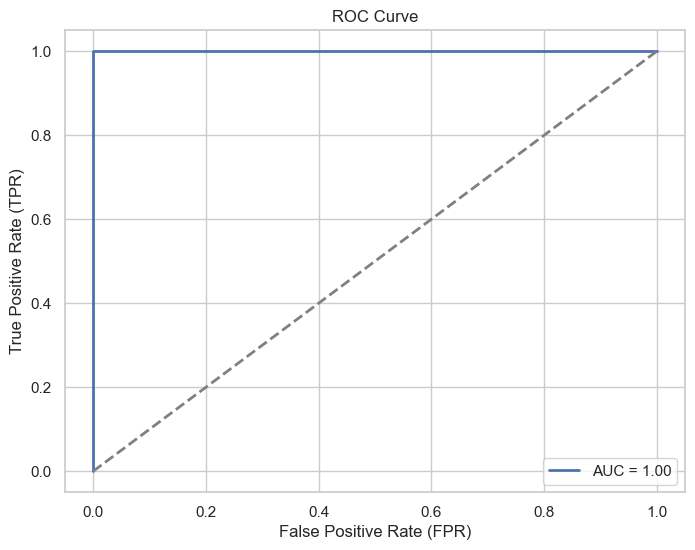

In [65]:
# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', lw=2, label=f'AUC = {stack_test_roc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## Artificial Neural Networks

> Indented block

> Indented block





In [66]:
results = {
    'Model Name': ['Logistic Regression','Decision Tree', 'KNN', 'Random Forest', 'Bagging', 'AdaBoost', 'Gradient Boost', 'SVC Linear Kernel', 'SVC Polynomial Kernel', 'SVC RBF Kernel', 'Stacking'],
    'Training Accuracy': [log_train_acc, dec_train_acc, knn_train_acc, rnd_train_acc, bag_train_acc, ada_train_acc, grad_train_acc, svcl_train_acc, svcp_train_acc, svcr_train_acc, stack_train_acc],
    'Testing Accuracy': [log_test_acc, dec_test_acc, knn_test_acc, rnd_test_acc, bag_test_acc, ada_test_acc, grad_test_acc, svcl_test_acc, svcp_test_acc, svcr_test_acc, stack_test_acc],
    'Training F1 Score': [log_train_f1, dec_train_f1, knn_train_f1, rnd_train_f1, bag_train_f1, ada_train_f1, grad_train_f1, svcl_train_f1, svcp_train_f1, svcr_train_f1, stack_train_f1],
    'Testing F1 Score': [log_test_f1, dec_test_f1, knn_test_f1, rnd_test_f1, bag_test_f1, ada_test_f1, grad_test_f1, svcl_test_f1, svcp_test_f1, svcr_test_f1, stack_test_f1],
    'Training Precision': [log_train_prec, dec_train_prec, knn_train_prec, rnd_train_prec, bag_train_prec, ada_train_prec, grad_train_prec, svcl_train_prec, svcp_train_prec, svcr_train_prec, stack_train_prec],
    'Testing Precision': [log_test_prec, dec_test_prec, knn_test_prec, rnd_test_prec, bag_test_prec, ada_test_prec, grad_test_prec, svcl_test_prec, svcp_test_prec, svcr_test_prec, stack_test_prec],
    'Training ROC-AUC Score': [log_train_roc, dec_train_roc, knn_train_roc, rnd_train_roc, bag_train_roc, ada_train_roc, grad_train_roc, svcl_train_roc, svcp_train_roc, svcr_train_roc, stack_train_roc],
    'Testing ROC-AUC Score': [log_test_roc, dec_test_roc, knn_test_roc, rnd_test_roc, bag_test_roc, ada_test_roc, grad_test_roc, svcl_test_roc, svcp_test_roc, svcr_test_roc, stack_test_roc]
}

results_df = pd.DataFrame(results)
results_df

,Model Name,Training Accuracy,Testing Accuracy,Training F1 Score,Testing F1 Score,Training Precision,Testing Precision,Training ROC-AUC Score,Testing ROC-AUC Score
0,Logistic Regression,0.994286,1.000000,0.994975,1.000000,0.99,1.000000,0.993421,1.000000
1,Decision Tree,1.000000,1.000000,1.000000,1.000000,1.00,1.000000,1.000000,1.000000
2,KNN,1.000000,1.000000,1.000000,1.000000,1.00,1.000000,1.000000,1.000000
3,Random Forest,1.000000,1.000000,1.000000,1.000000,1.00,1.000000,1.000000,1.000000
4,Bagging,1.000000,1.000000,1.000000,1.000000,1.00,1.000000,1.000000,1.000000
5,AdaBoost,1.000000,1.000000,1.000000,1.000000,1.00,1.000000,1.000000,1.000000
6,Gradient Boost,1.000000,1.000000,1.000000,1.000000,1.00,1.000000,1.000000,1.000000
7,SVC Linear Kernel,0.994286,1.000000,0.994975,1.000000,0.99,1.000000,0.993421,1.000000
8,SVC Polynomial Kernel,1.000000,1.000000,1.000000,1.000000,1.00,1.000000,1.000000,1.000000
9,SVC RBF Kernel,1.000000,0.986667,1.000000,0.988764,1.00,0.977778,1.000000,0.983871


In [67]:
results_df.sort_values(by=['Training F1 Score', 'Testing F1 Score'], ascending=False)

,Model Name,Training Accuracy,Testing Accuracy,Training F1 Score,Testing F1 Score,Training Precision,Testing Precision,Training ROC-AUC Score,Testing ROC-AUC Score
1,Decision Tree,1.000000,1.000000,1.000000,1.000000,1.00,1.000000,1.000000,1.000000
2,KNN,1.000000,1.000000,1.000000,1.000000,1.00,1.000000,1.000000,1.000000
3,Random Forest,1.000000,1.000000,1.000000,1.000000,1.00,1.000000,1.000000,1.000000
4,Bagging,1.000000,1.000000,1.000000,1.000000,1.00,1.000000,1.000000,1.000000
5,AdaBoost,1.000000,1.000000,1.000000,1.000000,1.00,1.000000,1.000000,1.000000
6,Gradient Boost,1.000000,1.000000,1.000000,1.000000,1.00,1.000000,1.000000,1.000000
8,SVC Polynomial Kernel,1.000000,1.000000,1.000000,1.000000,1.00,1.000000,1.000000,1.000000
10,Stacking,1.000000,1.000000,1.000000,1.000000,1.00,1.000000,1.000000,1.000000
9,SVC RBF Kernel,1.000000,0.986667,1.000000,0.988764,1.00,0.977778,1.000000,0.983871
0,Logistic Regression,0.994286,1.000000,0.994975,1.000000,0.99,1.000000,0.993421,1.000000


--------------------------

From the results table it is clear that the **Decision Tree, KNN, Random Forest, Bagging, AdaBoost, Gradient Boost, SVC Polynomial Kernel, Stacking and the Neural Network classifiers** has the highest F1 Score of 100%.